In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [102]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [103]:
BaseDataPath = "./CifarHundredDataset/"
MetaDataPath =  BaseDataPath + "meta"
metadata = unpickle(MetaDataPath)
superclass_dict = dict(list(enumerate(metadata[b'coarse_label_names'])))
print(superclass_dict)

{0: b'aquatic_mammals', 1: b'fish', 2: b'flowers', 3: b'food_containers', 4: b'fruit_and_vegetables', 5: b'household_electrical_devices', 6: b'household_furniture', 7: b'insects', 8: b'large_carnivores', 9: b'large_man-made_outdoor_things', 10: b'large_natural_outdoor_scenes', 11: b'large_omnivores_and_herbivores', 12: b'medium_mammals', 13: b'non-insect_invertebrates', 14: b'people', 15: b'reptiles', 16: b'small_mammals', 17: b'trees', 18: b'vehicles_1', 19: b'vehicles_2'}


In [104]:
# metadata.keys()
fineclass_dict = dict(list(enumerate(metadata[b'fine_label_names'])))
print(fineclass_dict)

{0: b'apple', 1: b'aquarium_fish', 2: b'baby', 3: b'bear', 4: b'beaver', 5: b'bed', 6: b'bee', 7: b'beetle', 8: b'bicycle', 9: b'bottle', 10: b'bowl', 11: b'boy', 12: b'bridge', 13: b'bus', 14: b'butterfly', 15: b'camel', 16: b'can', 17: b'castle', 18: b'caterpillar', 19: b'cattle', 20: b'chair', 21: b'chimpanzee', 22: b'clock', 23: b'cloud', 24: b'cockroach', 25: b'couch', 26: b'crab', 27: b'crocodile', 28: b'cup', 29: b'dinosaur', 30: b'dolphin', 31: b'elephant', 32: b'flatfish', 33: b'forest', 34: b'fox', 35: b'girl', 36: b'hamster', 37: b'house', 38: b'kangaroo', 39: b'keyboard', 40: b'lamp', 41: b'lawn_mower', 42: b'leopard', 43: b'lion', 44: b'lizard', 45: b'lobster', 46: b'man', 47: b'maple_tree', 48: b'motorcycle', 49: b'mountain', 50: b'mouse', 51: b'mushroom', 52: b'oak_tree', 53: b'orange', 54: b'orchid', 55: b'otter', 56: b'palm_tree', 57: b'pear', 58: b'pickup_truck', 59: b'pine_tree', 60: b'plain', 61: b'plate', 62: b'poppy', 63: b'porcupine', 64: b'possum', 65: b'rabbit'

In [105]:
data_train_path = BaseDataPath + "train"
data_test_path = BaseDataPath + "test"

data_train_dict = unpickle(data_train_path)
data_test_dict = unpickle(data_test_path)


# Get data (change the coarse_labels if you want to use the 100 classes)
data_train = data_train_dict[b'data']
label_train = np.array(data_train_dict[b'coarse_labels'])
data_test = data_test_dict[b'data']
label_test = np.array(data_test_dict[b'coarse_labels'])
fine_labels_train = np.array(data_train_dict[b'fine_labels'])
fine_labels_test = np.array(data_test_dict[b'fine_labels'])

In [106]:
thisdict =	{
  0: "bottle",
  1: "bowl",
  2: "can",
  3:"cup",
  4:"plate"
}
print(fine_labels_train)
fine_labels_train.shape

[19 29  0 ...  3  7 73]


(50000,)

In [107]:
print(fine_labels_test)
fine_labels_test.shape

[49 33 72 ... 51 42 70]


(10000,)

In [108]:
print(data_train_dict.keys())

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])


In [109]:
print(label_train)
label_train.shape

[11 15  4 ...  8  7  1]


(50000,)

In [110]:
# print(label_train)
data_train.shape

(50000, 3072)

In [111]:
data_train = data_train.reshape(len(data_train), 3,32,32)
data_train = data_train.transpose(0,2,3,1)
data_train.shape

(50000, 32, 32, 3)

In [112]:
data_test = data_test.reshape(len(data_test), 3,32,32)
data_test = data_test.transpose(0,2,3,1)
data_test.shape

(10000, 32, 32, 3)

In [113]:
print(data_train)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [195 205 193]
   [212 224 204]
   [182 194 167]]

  [[255 255 255]
   [254 254 254]
   [254 254 254]
   ...
   [170 176 150]
   [161 168 130]
   [146 154 113]]

  [[255 255 255]
   [254 254 254]
   [255 255 255]
   ...
   [189 199 169]
   [166 178 130]
   [121 133  87]]

  ...

  [[148 185  79]
   [142 182  57]
   [140 179  60]
   ...
   [ 30  17   1]
   [ 65  62  15]
   [ 76  77  20]]

  [[122 157  66]
   [120 155  58]
   [126 160  71]
   ...
   [ 22  16   3]
   [ 97 112  56]
   [141 161  87]]

  [[ 87 122  41]
   [ 88 122  39]
   [101 134  56]
   ...
   [ 34  36  10]
   [105 133  59]
   [138 173  79]]]


 [[[255 255 255]
   [253 253 253]
   [253 253 253]
   ...
   [253 253 253]
   [253 253 253]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

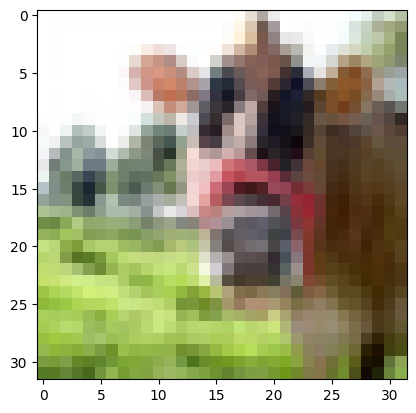

In [114]:
plt.imshow(data_train[0])
# plt.xlabel()

In [115]:
mask = (label_train == 3)
mask_test = (label_test == 3)

# If you also want to extract corresponding labels
selected_labels_train = label_train[mask]
selected_labels_test = label_test[mask_test]


selected_fine_labels_train = fine_labels_train[mask]
print(selected_fine_labels_train)
selected_fine_labels_train.shape

[28  9 61 ... 16 16 16]


(2500,)

In [116]:
selected_fine_labels_test = fine_labels_test[mask_test]
print(selected_fine_labels_test)
selected_fine_labels_test.shape

[16 61  9 10  9 10 16 10  9 28 28 16 16 28 16 28 10 61  9 10 10 10 28 16
 10 10 16 10  9 28  9 10  9 61 28 10 61 61 61 10 16 16  9 10 10 16 28  9
 10 28  9  9 16 28 10  9 16 28 61  9  9 28 61 16 28 28 28 16  9 61 28 10
 16 28  9  9 10 28 28 28  9 61  9 16 16 10  9 61 16 61 16 61 10 61 10 61
 10 16 61 28 10 28 16 28 10 28 28  9 61  9 61 28 61  9 16 16 10 28 16 10
 28 28 16 61 10 10 10  9 61 61 61 10  9  9 16 61 16  9 16 16 28 28 16 10
 10 61 16 28 61 10 10 61  9 16 61  9 61 16  9 16  9 10 10 10 16  9 10  9
  9 16 10 28 10  9 16 10  9 10 16 28  9 10 16 28  9 28 16 16 28 28 61 10
 10 28 10 61 10  9  9 28 16 10 61 61 61  9  9 16 61 10 16 61 10 61 61  9
 61  9  9 10 16 10 10 10 10 16 61 28 28 61 61 28  9  9 61  9 10 61  9 16
 10 28 16 16 28  9  9 61 16 28  9 10 61  9 28 10 28 61 61 28 28 16 16 61
 10 16 16 61  9 61 61 61 28 61 28 28 16  9 10 16 28 28 10 28 16 16 16 28
 61  9 10 16  9 16 28 28 16 28 10 16 16 61 28  9 16 61  9  9  9 10 61 16
 16 28 10 10  9 28 61 16  9 28 28  9  9 61  9 28 10

(500,)

In [117]:
# Use the mask to extract images corresponding to the selected labels
# selected_images = images[mask]
selected_images_train = data_train[mask]
selected_images_train.shape

(2500, 32, 32, 3)

In [118]:
selected_images_test = data_test[mask_test]
selected_images_test.shape

(500, 32, 32, 3)

In [119]:

replacements = {9: 0, 10: 1, 16: 2, 28: 3, 61: 4}

# Replace numbers in the array
modified_labels_train = [replacements[num] if num in replacements else num for num in selected_fine_labels_train]
# print(selected_fine_labels_train)
# print(modified_array_train)
modified_labels_test = [replacements[num] if num in replacements else num for num in selected_fine_labels_test]
# print(selected_fine_labels_test)
# print(modified_array_test)

In [120]:
# Normalize selected data
X_train = selected_images_train / 255
X_test = selected_images_test / 255
y_train = np.array(modified_labels_train)
y_test = np.array(modified_labels_test)

Text(0.5, 0, 'plate')

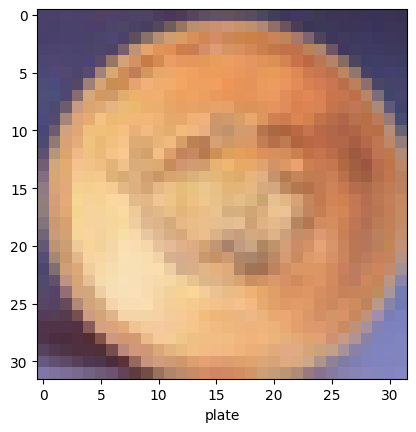

In [121]:
trainV = 400
plt.imshow(selected_images_train[trainV])
plt.xlabel(thisdict[y_train[trainV]])

In [122]:
# # Define the convolution operation
# def convolution(image, kernel):
#     # Image dimensions
#     image_width = image.shape
#     image_height = image.shape
#     # Kernel dimensions
#     kernel_width = kernel.shape
#     kernel_height = kernel.shape
#     # Output dimensions
#     output_height = image_height - kernel_height + 1
#     output_width = image_width - kernel_width + 1
#     # Initialize output
#     output = np.zeros((output_height, output_width))
    
#     # Convolution operation
#     for i in range(output_height):
#         for j in range(output_width):
#             output[i, j] = np.sum(image[i:i+kernel_height, j:j+kernel_width] * kernel)
    
#     return output

In [123]:
def convolution(image, kernel):
    # Image dimensions
    num_images, image_height, image_width, image_channels = image.shape
    # Kernel dimensions
    kernel_height, kernel_width, kernel_channels = kernel.shape
    # Output dimensions
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    # Initialize output
    output = np.zeros((num_images, output_height, output_width, kernel_channels))
    
    # Convolution operation
    for n in range(num_images):
        for i in range(output_height):
            for j in range(output_width):
                for c in range(kernel_channels):
                    output[n, i, j, c] = np.sum(image[n, i:i+kernel_height, j:j+kernel_width, :] * kernel[:, :, c])
    
    return output


In [124]:
# # Define the max pooling operation
# def max_pooling(image, pool_size, stride):
#     # Image dimensions
#     image_width = image.shape
#     image_height = image.shape
#     # Pooling dimensions
#     pool_width = pool_size
#     pool_height = pool_size
#     # Stride dimensions
#     stride_width = stride
#     stride_height = stride
#     # Output dimensions
#     output_height = (image_height - pool_height) // stride_height + 1
#     output_width = (image_width - pool_width) // stride_width + 1
#     # Initialize output
#     output = np.zeros((output_height, output_width))
    
#     # Max pooling operation
#     for i in range(0, image_height - pool_height + 1, stride_height):
#         for j in range(0, image_width - pool_width + 1, stride_width):
#             window = image[i:i+pool_height, j:j+pool_width]
#             output[i//stride_height, j//stride_width] = np.max(window)
    
#     return output


In [125]:
def max_pooling(image, pool_size, stride):
    # Image dimensions
    num_images, image_height, image_width, image_channels = image.shape
    # Pooling dimensions
    pool_height, pool_width = pool_size
    # Stride dimensions
    stride_height, stride_width = stride
    # Output dimensions
    output_height = (image_height - pool_height) // stride_height + 1
    output_width = (image_width - pool_width) // stride_width + 1
    # Initialize output
    output = np.zeros((num_images, output_height, output_width, image_channels))
    
    # Max pooling operation
    for n in range(num_images):
        for c in range(image_channels):
            for i in range(0, image_height - pool_height + 1, stride_height):
                for j in range(0, image_width - pool_width + 1, stride_width):
                    window = image[n, i:i+pool_height, j:j+pool_width, c]
                    output[n, i//stride_height, j//stride_width, c] = np.max(window)
    
    return output


In [126]:
# Define the ReLU activation function
def relu(x):
    return np.maximum(x, 0)

In [127]:
# Define the softmax activation function
def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=-1, keepdims=True)

In [128]:
# Define the fully connected layer
def fully_connected(input_layer, weights, biases):
    return np.dot(input_layer, weights) + biases

In [129]:
# Define the training loop
def train(images, labels, num_epochs, learning_rate, num_filters, num_filters2):
    # Initialize weights and biases
    np.random.seed(0)
    conv1_weights = np.random.randn(3, 3, num_filters) / 9
    conv2_weights = np.random.randn(3, 3, num_filters2) / 9
    fc_weights = np.random.randn(8*8*num_filters2, 128) / (8*8*num_filters2)
    output_weights = np.random.randn(128, 5) / 128
    
    conv1_bias = np.zeros((1, 1, num_filters))
    conv2_bias = np.zeros((1, 1, num_filters2))
    fc_bias = np.zeros((1, 128))
    output_bias = np.zeros((1, 5))
    
    # Training loop
    for epoch in range(num_epochs):
        # Forward pass
        conv1_out = convolution(images, conv1_weights) + conv1_bias
        conv1_out_relu = relu(conv1_out)
        pool1_out = max_pooling(conv1_out_relu, pool_size=(2, 2), stride=(2, 2))
        
        conv2_out = convolution(pool1_out, conv2_weights) + conv2_bias
        conv2_out_relu = relu(conv2_out)
        pool2_out = max_pooling(conv2_out_relu, pool_size=(2, 2), stride=(2, 2))
        
        fc_input = pool2_out.flatten().reshape(-1, 1)
        fc_out = fully_connected(fc_input, fc_weights, fc_bias)
        fc_out_relu = relu(fc_out)
        
        output = fully_connected(fc_out_relu, output_weights, output_bias)
        output_softmax = softmax(output)
        
        # Compute loss
        num_samples = labels.shape[0]
        loss = -np.sum(np.log(output_softmax[range(num_samples), labels])) / num_samples
        
        # Backward pass (Gradient descent)
        doutput = output_softmax.copy()
        doutput[range(num_samples), labels] -= 1
        doutput /= num_samples
        
        doutput_weights = np.dot(fc_out_relu.T, doutput)
        doutput_bias = np.sum(doutput, axis=0, keepdims=True)
        
        dfc_out_relu = np.dot(doutput, output_weights.T)
        dfc_out = dfc_out_relu * (fc_out > 0)
        
        dfc_weights = np.dot(pool2_out.flatten().reshape(-1, 1).T, dfc_out)
        dfc_bias = np.sum(dfc_out, axis=0, keepdims=True)
        
        dpool2_out = np.dot(dfc_out, fc_weights.T)
        dpool2_out_reshaped = dpool2_out.reshape(pool2_out.shape)
        
        dconv2_out_relu = np.zeros_like(conv2_out_relu)
        for i in range(pool2_out.shape[0]):
            for j in range(pool2_out.shape[1]):
                window = conv2_out[i*2:i*2+2, j*2:j*2+2]
                window_mask = (window == np.max(window))
                dconv2_out_relu[i*2:i*2+2, j*2:j*2+2] = dpool2_out_reshaped[i, j] * window_mask
        
        dconv2_out = dconv2_out_relu * (conv2_out > 0)
        
        dconv2_weights = convolution(pool1_out, dconv2_out)
        dconv2_bias = np.sum(dconv2_out)
        
        dpool1_out = convolution(dconv2_out, conv2_weights.transpose(1, 0, 2))
        
        dpool1_out_reshaped = dpool1_out.reshape(pool1_out.shape)
        
        dconv1_out_relu = np.zeros_like(conv1_out_relu)
        for i in range(pool1_out.shape[0]):
            for j in range(pool1_out.shape[1]):
                window = conv1_out[i*2:i*2+2, j*2:j*2+2]
                window_mask = (window == np.max(window))
                dconv1_out_relu[i*2:i*2+2, j*2:j*2+2] = dpool1_out_reshaped[i, j] * window_mask
        
        dconv1_out = dconv1_out_relu * (conv1_out > 0)
        
        dconv1_weights = convolution(images, dconv1_out)
        dconv1_bias = np.sum(dconv1_out)
        
        # Update weights and biases
        conv1_weights -= learning_rate * dconv1_weights
        conv1_bias -= learning_rate * dconv1_bias
        conv2_weights -= learning_rate * dconv2_weights
        conv2_bias -= learning_rate * dconv2_bias
        fc_weights -= learning_rate * dfc_weights
        fc_bias -= learning_rate * dfc_bias
        output_weights -= learning_rate * doutput_weights
        output_bias -= learning_rate * doutput_bias
        
        # Compute accuracy
        predictions = np.argmax(output_softmax, axis=1)
        accuracy = np.mean(predictions == labels) * 100  # Accuracy in percentage

        # Print loss and accuracy
        print("Epoch {}: Loss {:.4f}, Accuracy {:.2f}%".format(epoch + 1, loss, accuracy))

        # Print loss every epoch
        # print("Epoch {}: Loss {}".format(epoch+1, loss))

# Example usage
# Assume you have your dataset in x_train and y_train
# Assuming x_train is a numpy array of shape (num_samples, image_height, image_width)
# and y_train is a numpy array of shape (num_samples,)

# Set hyperparameters
num_epochs = 10
learning_rate = 0.01
num_filters = 32  # Number of filters in convolution layers
num_filters2 = 64

# Train the model
train(X_train, y_train, num_epochs, learning_rate, num_filters, num_filters2)

